In [1]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
data_x = df.drop(['gender','smoking_history','diabetes'],axis='columns')
data_y = df.diabetes

In [4]:
data_x.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
data_x.age = data_x.age.fillna(data_x.age.mean())


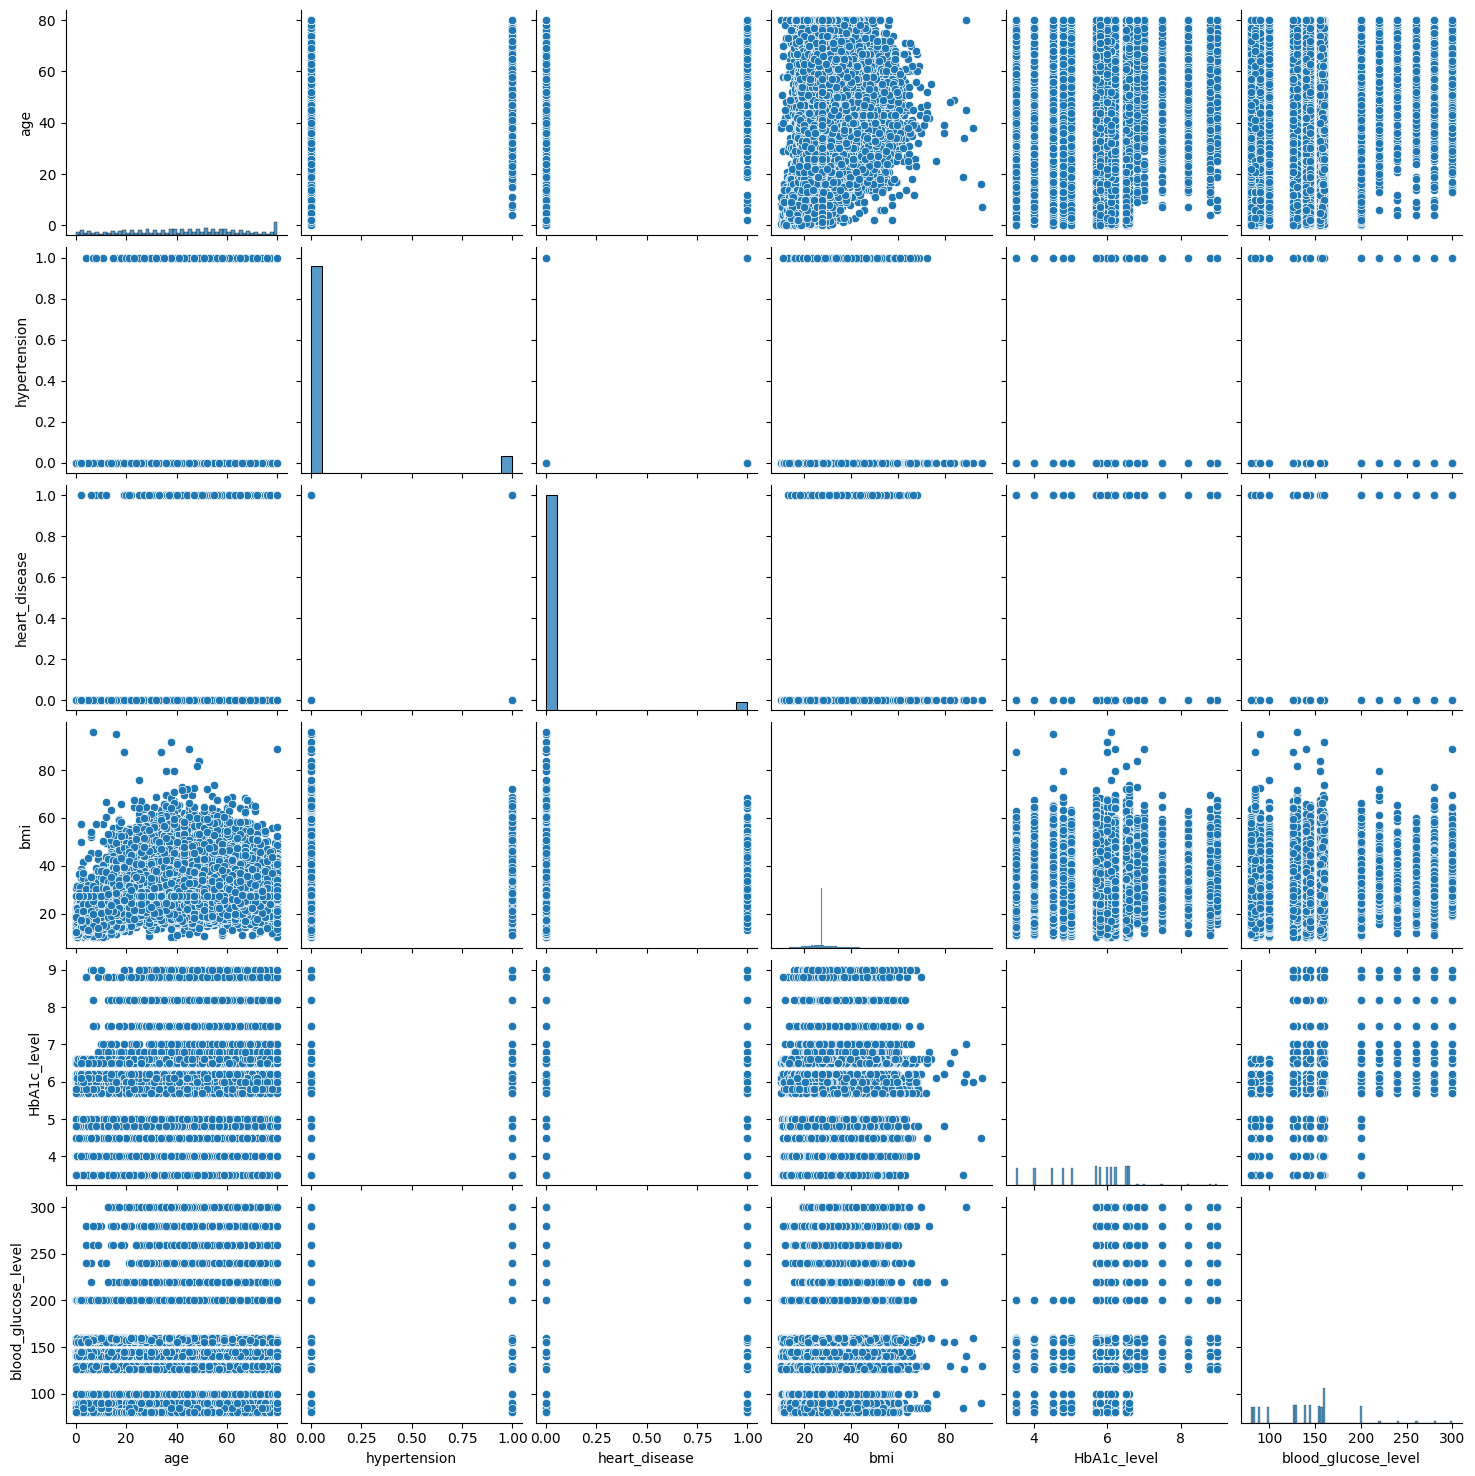

In [7]:
sns.pairplot(data_x)

In [8]:
forest = RandomForestClassifier()

In [9]:
forest.fit(data_x,data_y)

RandomForestClassifier()

In [10]:
print(f'El score del modelo es: {round(forest.score(data_x,data_y),4)*100}%')

El score del modelo es: 99.69%


In [17]:
result = ['no tiene diabetes','tiene diabetes']
hyper = ['no tiene hipertensión','tiene hipertensión']
heart = ['no tiene problemas cardiacos', 'tiene problema cardiacos']
age = 44
hypertension = 0
heart_disease = 0
bmi = 19.31
hba1c = 6.5
blood_glucose = 200

In [18]:
def classify_diabetes(model, age, hypertension, heart_disease, bmi, hba1c,blood_glucose):
    predicted = model.predict([[age,hypertension,heart_disease,bmi,hba1c,blood_glucose]])
    print(f'Una personas de {age} años, que {hyper[hypertension]}, {heart[heart_disease]} , un imc de {bmi} , emoglobina de {hba1c} y un nivel de glucosa de {blood_glucose}. se determina que {result[predicted[0]]}')

In [19]:
classify_diabetes(forest,age,hypertension,heart_disease,bmi,hba1c,blood_glucose)

Una personas de 44 años, que no tiene hipertensión, no tiene problemas cardiacos , un imc de 19.31 , emoglobina de 6.5 y un nivel de glucosa de 200. se determina que tiene diabetes


d:\algoritmica\algoritmica-2023-2\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
